<a href="https://colab.research.google.com/github/dev-researcher/automatas/blob/main/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1 (2024)
Profesor: Tomás de Camino Beck, Ph.D.


---

### Instrucciones Generales

- **Entrega**: *3 de Septiembre* antes de media noche. La tarea debe ser enviada por un miembro del equipo
-**Lectura**:  Gran parte de los problemas se basan en el capítulo 4 del libro, apoyado en los capítulos anteriores. Puede que tenga que revisar secciones no vistas en clase.

- **Formato de Entrega:** Los problemas deben ser entregados como un archivo Jupyter Notebook (.ipynb) de Google Colab que incluya todas las soluciones, explicaciones, ejemplos y pruebas solicitadas. Enviar al email del profesor.
- **Estructura del Informe:**
  - **Equipo:** Indicar nombre completo e identificación de cada miebro
  - **Introducción:** Breve introducción a cada problema, explicando el enfoque general.
  - **Código:** Cada problema debe incluir el código bien comentado.
  - **Ejemplos:** Deben incluirse ejemplos de uso del código con entradas específicas y resultados esperados.
  - **Pruebas:** Incluir casos de prueba que demuestren la funcionalidad del código, con explicaciones de los resultados.
  - **Conclusión:** Breve conclusión sobre cada problema, discutiendo cualquier desafío encontrado y cómo fue resuelto.

## Equipo

- Brian Morera Madriz TBD
- Elena Portuguez Mora 702170005
- Bryhan Rodríguez Mora 115420325

## Base Source Code and utilities

### Constants

In [ ]:
EPSILON = 'ε'

## Imports

In [ ]:
import ipytest
ipytest.autoconfig()

## Automata Definition

In [ ]:
class Automata:
    def __init__(self, states, alphabet, transitions, start_state, final_states) -> None:
        """
        Constructor de NFA
        Args:
            states (list<str>): Lista de todos los estados
            alphabet (list<str>): Lista de las letras del alfabeto
            transitions (dict): Funcion de transicion
            start_state (str): Estado inicial
            final_states (list<str>): Lista de los estados finales
        Returns:
            None
        """
        self.states = states
        self.alphabet = alphabet
        self.transitions = transitions
        self.start_state = start_state
        self.final_states = final_states


    def __str__(self):
        """
        Imprime los estados y transiciones de los estados
        """
        transitions_str = '\n'.join(
            [f"{state} --{symbol}--> {', '.join(next_states)}"
             for state, paths in self.transitions.items()
             for symbol, next_states in paths.items()]
        )
        return (
            f"=====================================\n"
            f"States: {self.states}\n"
            f"Alphabet: {self.alphabet}\n"
            f"Transitions:\n{transitions_str}\n"
            f"Start State: {self.start_state}\n"
            f"Final States: {self.final_states}\n"
            f"=====================================\n"
        )

## DFA

En caso de que necesitemos una clase DFA

In [ ]:
class DFA(Automata):
    def __init__(self, states, alphabet, transitions, start_state, final_states, name='') -> None:
        super().__init__(states, alphabet, transitions, start_state, final_states)
        self.name = name


    def __str__(self):
        """
        Imprime los estados y transiciones de los estados
        """

        return (
            f"\n=====================================\n"
            f"DFA: {self.name}\n" +
            super().__str__()
        )



## NFA

Considerando una clase simple NFA, la cual es capaz de imprimir los estados y las transacciones de una manera comprensiva.

In [ ]:
class NFA(Automata):
    def __init__(self, states, alphabet, transitions, start_state, final_states, name='') -> None:
        super().__init__(states, alphabet, transitions, start_state, final_states)
        self.name = name

    def get_states_from_transitions(self) -> int:
        target_states = set()
        for keyL1 in self.transitions.keys():
            for keyL2 in self.transitions[keyL1].keys():
                targets = self.transitions[keyL1][keyL2]
                target_states = target_states.union(targets)
        return len(target_states) + 1 # initial state

    def __str__(self):
        """
        Imprime los estados y transiciones de los estados
        """
        return (
            f"\n=====================================\n"
            f"NFA: {self.name}\n" +
            super().__str__()
        )

    def replace_state(self, old_value, new_value):
        if self.start_state == old_value:
            self.start_state = new_value

        if old_value in self.final_states:
            self.final_states = set(map(lambda x: x.replace(old_value, new_value), list(self.final_states)))

        if old_value in self.states:
            self.states = set(map(lambda x: x.replace(old_value, new_value), list(self.states)))

        key_l1 = self.transitions.keys()
        if old_value in key_l1:
            self.transitions[new_value] = self.transitions[old_value]
            del self.transitions[old_value]

        key_l1 = self.transitions.keys()
        for keyl1 in key_l1:
            for keyl2 in self.transitions[keyl1].keys():
                if old_value in self.transitions[keyl1][keyl2]:
                    self.transitions[keyl1][keyl2] = set(map(lambda x: x.replace(old_value, new_value), list(self.transitions[keyl1][keyl2])))


## Solución

---

#### **Problema 1: Construcción e Implementación de `RegtoNFA` con Expresiones Regulares Avanzadas**
- **Descripción:**
  - Implementa en Python el algoritmo `RegtoNFA` que convierte una expresión regular avanzada, que incluye operadores como repetición variable $\{m,n\}$, en un NFA (Autómata Finito No Determinista). Este NFA debe ser capaz de reconocer si algún prefijo de un texto dado pertenece al lenguaje $L(\Sigma^*p)$.

El siguiente codigo fue generado con ayuda de Chat-GPT. Sin embargo, revisando el mismo se encontraron 1 mejora y 2 bug en la codificacion generada.

##### Mejoras
- Incialmente el codigo representaba las transiciones epsilon con un simbolo vacio, por lo que se edito para la utilizacion del simbolo `ε`.

##### Errores de codigo
- En el caso de los regex de concatenacion de simbolos del del alfabeto, por ejemplo para el regex `ab`, donde el alfabeto es {'a', 'b'}, el NFA resultante indicaba que su lenguage consistia unicamente de `a`. Despues de una validacion se logra concluir que para las concatenaciones solo tomaba el primer simbolo, aunque las transiciones si consideraba el alfabeto completo.
-  En el caso del regex vacio, con regex='', el NFA no indicaba la transicion epsilon entre el estado incial y final.

In [ ]:
class RegToNFA:
    def __init__(self):
        self.state_count = 0

    def _new_state(self):
        self.state_count += 1
        return f"S{self.state_count}"

    def regex_to_nfa(self, regex, name=''):
        self.name = name
        return self._regex_to_nfa_helper(regex)

    def _regex_to_nfa_helper(self, regex):
        if not len(regex):
            return self._empty_nfa()
        elif len(regex) == 1:
            return self._single_char_nfa(regex)
        elif '|' in regex:
            return self._union_nfa(regex)
        elif '*' in regex:
            return self._kleene_star_nfa(regex)
        else:
            return self._concat_nfa(regex)

    def _empty_nfa(self):
        start_state = self._new_state()
        final_state = self._new_state()
        return NFA(
            states={start_state, final_state},
            alphabet=set(),
            start_state=start_state,
            final_states={final_state},
            name=self.name,
            transitions = {
                start_state: {EPSILON: {final_state}}
            }
        )

    def _single_char_nfa(self, char):
        start_state = self._new_state()
        final_state = self._new_state()
        transitions = {start_state: {char: {final_state}}}
        return NFA(
            states={start_state, final_state},
            alphabet={char},
            transitions=transitions,
            start_state=start_state,
            final_states={final_state},
            name=self.name
        )

    def _concat_nfa(self, regex):
        new_state = self._new_state()
        first_nfa = self._regex_to_nfa_helper(regex[0])
        rest_nfa = self._regex_to_nfa_helper(regex[1:])

        rest_nfa.replace_state(rest_nfa.start_state, new_state)
        for state in first_nfa.final_states:
            first_nfa.replace_state(state, new_state)

        new_state = self._new_state()
        first_nfa.states.update(rest_nfa.states)
        first_nfa.transitions.update(rest_nfa.transitions)
        first_nfa.final_states = rest_nfa.final_states
        first_nfa.alphabet.update(rest_nfa.alphabet)

        return first_nfa

    def _union_nfa(self, regex):
        parts = regex.split('|')
        nfa1 = self._regex_to_nfa_helper(parts[0])
        nfa2 = self._regex_to_nfa_helper(parts[1])

        start_state = self._new_state()
        final_state = self._new_state()

        transitions = {
            start_state: {EPSILON: {nfa1.start_state, nfa2.start_state}},
            **nfa1.transitions,
            **nfa2.transitions,
            nfa1.final_states.pop(): {EPSILON: {final_state}},
            nfa2.final_states.pop(): {EPSILON: {final_state}},
        }

        states = {start_state, final_state, *nfa1.states, *nfa2.states}
        alphabet = nfa1.alphabet.union(nfa2.alphabet)

        return NFA(
            states=states,
            alphabet=alphabet,
            transitions=transitions,
            start_state=start_state,
            final_states={final_state},
            name=self.name
        )

    def _kleene_star_nfa(self, regex):
        inner_regex = regex.replace('*', '')
        inner_nfa = self._regex_to_nfa_helper(inner_regex)

        start_state = self._new_state()
        final_state = self._new_state()

        transitions = {
            start_state: {EPSILON: {inner_nfa.start_state, final_state}},
            inner_nfa.final_states.pop(): {EPSILON: {inner_nfa.start_state, final_state}},
            **inner_nfa.transitions
        }

        states = {start_state, final_state, *inner_nfa.states}
        alphabet = inner_nfa.alphabet

        return NFA(
            states=states,
            alphabet=alphabet,
            transitions=transitions,
            start_state=start_state,
            final_states={final_state},
            name=self.name
        )

##### Casos de usos:

In [ ]:
converter = RegToNFA()

![image.png](attachment:image.png)

In [ ]:
nfa = converter.regex_to_nfa('', 'Vacio')
print(nfa)


NFA: Vacio
States: {'S1', 'S2'}
Alphabet: set()
Transitions:
S1 --ε--> S2
Start State: S1
Final States: {'S2'}




![image.png](attachment:image.png)

In [ ]:
nfa = converter.regex_to_nfa('a', '1 letras')
print(nfa)


NFA: 1 letras
States: {'S4', 'S3'}
Alphabet: {'a'}
Transitions:
S3 --a--> S4
Start State: S3
Final States: {'S4'}




![image.png](attachment:image.png)

In [ ]:
nfa = converter.regex_to_nfa('a|b', 'Condicion or')
print(nfa)


NFA: Condicion or
States: {'S5', 'S9', 'S10', 'S7', 'S6', 'S8'}
Alphabet: {'a', 'b'}
Transitions:
S9 --ε--> S7, S5
S5 --a--> S6
S7 --b--> S8
S6 --ε--> S10
S8 --ε--> S10
Start State: S9
Final States: {'S10'}




![image.png](attachment:image.png)

In [ ]:
nfa = converter.regex_to_nfa('ab', '2 letras')
print(nfa)


NFA: 2 letras
States: {'S12', 'S15', 'S11'}
Alphabet: {'a', 'b'}
Transitions:
S12 --a--> S11
S11 --b--> S15
Start State: S12
Final States: {'S15'}




![image.png](attachment:image.png)

In [ ]:
nfa = converter.regex_to_nfa('a*', 'Al menos 1 a')
print(nfa)
nfa.get_states_from_transitions()


NFA: Al menos 1 a
States: {'S18', 'S17', 'S20', 'S19'}
Alphabet: {'a'}
Transitions:
S19 --ε--> S17, S20
S18 --ε--> S17, S20
S17 --a--> S18
Start State: S19
Final States: {'S20'}




4

##### Pruebas unitarias:

Para las validaciones se utiliza unit test y los casos previamente mostrados, los cuales se toman de este [link](https://www.tutorialspoint.com/what-is-the-conversion-of-a-regular-expression-to-finite-automata-nfa)

In [ ]:
def test_emptyRegex():
    converter = RegToNFA()
    nfa = converter.regex_to_nfa('')
    assert 2 == len(nfa.states)
    assert 2 == nfa.get_states_from_transitions()

def test_1varRegex():
    converter = RegToNFA()
    nfa = converter.regex_to_nfa('a')
    assert 2 == len(nfa.states)
    assert 2 == nfa.get_states_from_transitions()

def test_orRegex():
    converter = RegToNFA()
    nfa = converter.regex_to_nfa('a|b')
    assert 6 == len(nfa.states)
    assert 6 == nfa.get_states_from_transitions()

def test_concatRegex():
    converter = RegToNFA()
    nfa = converter.regex_to_nfa('ab')
    assert 3 == len(nfa.states)
    assert 3 == nfa.get_states_from_transitions()

def test_atLeast1aRegex():
    converter = RegToNFA()
    nfa = converter.regex_to_nfa('a*')
    assert 4 == len(nfa.states)
    assert 4 == nfa.get_states_from_transitions()

ipytest.run('-vv')

======================================= test session starts =======================================
platform win32 -- Python 3.11.9, pytest-8.3.2, pluggy-1.5.0 -- C:\Users\MSI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\MSI\OneDrive\Escritorio\Maestria\Automatas\AutomataTheory
plugins: anyio-3.6.2
collecting ... collected 6 items

t_6ad0b5008c3e4200919b61b1d4b105da.py::test_emptyRegex PASSED                                [ 16%]
t_6ad0b5008c3e4200919b61b1d4b105da.py::test_1varRegex PASSED                                 [ 33%]
t_6ad0b5008c3e4200919b61b1d4b105da.py::test_orRegex PASSED                                   [ 50%]
t_6ad0b5008c3e4200919b61b1d4b105da.py::test_concatRegex PASSED                               [ 66%]
t_6ad0b5008c3e4200919b61b1d4b105da.py::test_atLeast1aRegex PASSED                            [ 83%]
t_6ad0b5008c3e4200919b61b1d4b105da.py::test_epsilon_removal PASSED     

<ExitCode.OK: 0>

- **Parte 2:** **Desafío Adicional:** Extiende el NFA para manejar operaciones de intersección y unión en la expresión regular. Justifica cada paso de la construcción y proporciona ejemplos complejos que no solo contengan concatenación y cierre de Kleene, sino también intersección y unión.

In [ ]:
converter = RegToNFA()
nfa = converter.regex_to_nfa('a|b')
print(nfa)


NFA: 
States: {'S5', 'S1', 'S2', 'S4', 'S3', 'S6'}
Alphabet: {'a', 'b'}
Transitions:
S5 --ε--> S3, S1
S1 --a--> S2
S3 --b--> S4
S2 --ε--> S6
S4 --ε--> S6
Start State: S5
Final States: {'S6'}





#### **Problema 2: Optimización de NFA mediante Eliminación de Transiciones $\varepsilon$ y Minimización**
- **Descripción:**
  - Utiliza el NFA construido en el Problema 1, elimina las transiciones $\varepsilon$ y luego aplica técnicas de minimización para reducir el número de estados manteniendo la equivalencia del autómata.

##### 2.1 Introducción


La optimización de autómatas finitos no deterministas (NFA, por sus siglas en inglés) es un área fundamental en la teoría de autómatas y lenguajes formales, con aplicaciones directas en el diseño de compiladores, análisis sintáctico y otros campos de la informática teórica. Un aspecto crucial de esta optimización radica en la capacidad de reducir la complejidad del autómata sin alterar el lenguaje que reconoce, es decir, sin perder su equivalencia semántica.

Una de las técnicas más efectivas para optimizar un NFA es la **eliminación de transiciones \(\varepsilon\)**. Las transiciones \(\varepsilon\) son aquellas que permiten al autómata cambiar de estado sin consumir ningún símbolo de entrada. Aunque estas transiciones ofrecen flexibilidad durante la construcción del autómata, también introducen una complejidad adicional, tanto en términos de análisis como de procesamiento. Por ello, eliminar estas transiciones resulta en un autómata más simple y eficiente, lo que facilita su posterior análisis y optimización.

Tras la eliminación de las transiciones \(\varepsilon\), se procede a la **minimización del NFA**. Este proceso implica la identificación y combinación de estados equivalentes, es decir, aquellos que, para cualquier cadena de entrada, conducen al autómata a un comportamiento indistinguible. El objetivo final es reducir el número de estados del autómata al mínimo necesario, manteniendo la equivalencia del lenguaje reconocido.

Este enfoque de optimización no solo mejora la eficiencia del autómata resultante, sino que también es crucial para aplicaciones prácticas, donde la simplicidad del autómata puede traducirse en mejoras significativas en la velocidad de procesamiento y la utilización de recursos. La combinación de estas dos técnicas —eliminación de transiciones \(\varepsilon\) y minimización— representa un enfoque robusto y científicamente fundamentado para la optimización de NFAs, manteniendo intacta la semántica del autómata original.


Existen varias tecnicas para la minimizacion de NFA:

- Eliminación de Transiciones \(\varepsilon\)
- Eliminación de Estados Inalcanzables
- Eliminación de Estados Muertos
- Determinización Parcial
- Fusión de Estados Equivalentes


##### 2.2 Código

In [ ]:
class NFAOptimizer:

    def __init__(self) -> None:
        pass

    def _epsilon_closure_(self, nfa, state):
        """ Compute the epsilon closure of a state. """
        closure = {state}
        if EPSILON in nfa.transitions.get(state, {}):
            for next_state in nfa.transitions[state][EPSILON]:
                closure |= self._epsilon_closure_(nfa, next_state)
        return closure

    def remove_epsilon_transitions(self, nfa):
        """ Remove epsilon transitions using epsilon closure. """
        new_transitions = {}
        for state in nfa.states:
            new_transitions[state] = {}
            for symbol in nfa.alphabet:
                reachable = set(self._epsilon_closure_(nfa, state))
                for s in reachable:
                    if symbol in nfa.transitions.get(s, {}):
                        new_transitions[state][symbol] = new_transitions[state].get(symbol, set()) | nfa.transitions[s][symbol]
        return NFA(
            states=nfa.states,
            alphabet=nfa.alphabet,
            transitions=new_transitions,
            start_state=nfa.start_state,
            final_states=nfa.final_states,
            name=nfa.name
        )

    def eliminar_estados_inalcanzables(self, nfa):
        unreachables = set()
        por_visitar = {nfa.start_state}

        while por_visitar:
            estado_actual = por_visitar.pop()
            unreachables.add(estado_actual)

            for symbol in nfa.alphabet:
                if symbol in nfa.transitions.get(estado_actual, {}):
                    por_visitar.update(nfa.transitions[estado_actual][symbol])

        # Filtrar estados y transiciones
        new_states = [estado for estado in nfa.states if estado in unreachables]
        new_transitions = {state: trans for state, trans in nfa.transitions.items() if state in unreachables}
        new_final_states = [state for state in nfa.final_states if state in unreachables]

        return NFA(
            states= new_states,
            alphabet=nfa.alphabet,
            transitions=new_transitions,
            start_state=nfa.start_state,
            final_states=new_final_states,
            name=nfa.name
        )

    def eliminar_estados_muertos(self, nfa):

        vivos = set(nfa.final_states)
        por_visitar = set(nfa.final_states)

        while por_visitar:
            estado_actual = por_visitar.pop()

            for estado in nfa.states:
                for simbolo in nfa.alphabet:
                    if simbolo in nfa.transitions.get(estado, {}) and estado_actual in nfa.transitions[estado][simbolo]:
                        if estado not in vivos:
                            vivos.add(estado)
                            por_visitar.add(estado)

        # Filtrar estados y transiciones
        new_states = [estado for estado in nfa.states if estado in vivos]
        new_transitions = {estado: {simbolo: dest for simbolo, dest in trans.items() if all(d in vivos for d in dest)}
                            for estado, trans in nfa.transitions.items() if estado in vivos}
        new_final_states = [estado for estado in nfa.final_states if estado in vivos]

        return NFA(
            states= new_states,
            alphabet=nfa.alphabet,
            transitions=new_transitions,
            start_state=nfa.start_state,
            final_states=new_final_states,
            name=nfa.name
        )


##### 2.3 Ejemplo de uso



In [ ]:
# Definición del NFA

states= ['q0', 'q1', 'q2', 'q3', 'q4']
alphabet= ['a', 'b']
transitions= {
        'q0': {'a': {'q1'}},
        'q1': {'b': {'q2'}},
        'q2': {'a': {'q3'}, 'b': {'q3'}},
        'q3': {'a': {'q4'}},
        'q4': {}  # q4 es un estado muerto
    }
start_state= 'q0'
final_states= ['q3']


nfaOptimizer = NFAOptimizer()

nfaNoEpsilon = nfaOptimizer.remove_epsilon_transitions(nfa)

# Eliminación de estados inalcanzables
nfaWithoutUnreachables = nfaOptimizer.eliminar_estados_inalcanzables(nfaNoEpsilon)
print("NFA después de eliminar estados inalcanzables:", nfaWithoutUnreachables)

# Eliminación de estados muertos
nfaOptimized = nfaOptimizer.eliminar_estados_muertos(nfaWithoutUnreachables)
print("NFA después de eliminar estados muertos:", nfaOptimized)

NFA después de eliminar estados inalcanzables: 
NFA: 
States: ['S5', 'S2', 'S4']
Alphabet: {'a', 'b'}
Transitions:
S5 --a--> S2
S5 --b--> S4
Start State: S5
Final States: []


NFA después de eliminar estados muertos: 
NFA: 
States: []
Alphabet: {'a', 'b'}
Transitions:

Start State: S5
Final States: []




##### 2.4 Pruebas Unitarias

In [ ]:
def test_epsilon_removal():
    optimizer = NFAOptimizer()

    states = ['q0', 'q1', 'q2']
    alphabet = ['a', 'b']
    transitions = {
        'q0': {'a': {'q1'}},                # From q0, on 'a', move to q1
        'q1': {'b': {'q1'}, EPSILON: {'q2'}},    # From q1, on 'b', stay in q1 (loop for repetition), epsilon transition to q2
        'q2': {}                            # q2 is the accept state, no outgoing transitions
    }
    start_state = 'q0'
    final_states = ['q2']

    nfa = NFA(states=states, alphabet=alphabet, transitions=transitions, start_state=start_state, final_states=final_states)
    print(nfa)
    assert 3 == len(nfa.states)
    assert 2 == len(nfa.alphabet)
    assert 'q0' == nfa.start_state
    assert 1 == len(nfa.final_states)
    assert EPSILON in nfa.transitions['q1']

    #assert 2 == nfa.get_states_from_transitions()
    nfaNoEpsilon = optimizer.remove_epsilon_transitions(nfa)
    assert 3 == len(nfaNoEpsilon.states)
    assert 2 == len(nfaNoEpsilon.alphabet)
    assert 'q0' == nfaNoEpsilon.start_state
    assert ['q2'] == nfaNoEpsilon.final_states
    assert EPSILON not in nfaNoEpsilon.transitions['q1']


ipytest.run('-vv')

======================================= test session starts =======================================
platform win32 -- Python 3.11.9, pytest-8.3.2, pluggy-1.5.0 -- C:\Users\MSI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\MSI\OneDrive\Escritorio\Maestria\Automatas\AutomataTheory
plugins: anyio-3.6.2
collecting ... collected 6 items

t_6ad0b5008c3e4200919b61b1d4b105da.py::test_emptyRegex PASSED                                [ 16%]
t_6ad0b5008c3e4200919b61b1d4b105da.py::test_1varRegex PASSED                                 [ 33%]
t_6ad0b5008c3e4200919b61b1d4b105da.py::test_orRegex PASSED                                   [ 50%]
t_6ad0b5008c3e4200919b61b1d4b105da.py::test_concatRegex PASSED                               [ 66%]
t_6ad0b5008c3e4200919b61b1d4b105da.py::test_atLeast1aRegex PASSED                            [ 83%]
t_6ad0b5008c3e4200919b61b1d4b105da.py::test_epsilon_removal PASSED     

<ExitCode.OK: 0>

##### 2.5 Conclusión


TBD

#### - **Parte 2:** **Desafío Adicional:** Implementa un algoritmo de minimización de NFA basado en particiones de estados equivalentes. Realiza un análisis de eficiencia comparando el NFA original, el NFA sin transiciones $\varepsilon$, y el NFA minimizado, en términos de cantidad de estados y transiciones.

In [ ]:
class NFAMinimizer:
    def __init(self):
        pass


    def minimize(self, nfa):
        """ Minimize the NFA by merging equivalent states. """
        partitions = [set(nfa.final_states), set(nfa.states) - set(nfa.final_states)]
        changed = True

        while changed:
            changed = False
            new_partitions = []
            for partition in partitions:
                sub_partitions = self._refine_partition_(partition, partitions)
                new_partitions.extend(sub_partitions)
                if len(sub_partitions) > 1:
                    changed = True
            partitions = new_partitions

        state_mapping = {}
        for partition in partitions:
            representative = next(iter(partition))
            for state in partition:
                state_mapping[state] = representative

        new_states = list(set(state_mapping.values()))
        new_transitions = {}
        for state in new_states:
            new_transitions[state] = {}
            for symbol in nfa.alphabet:
                if symbol in nfa.transitions.get(state, {}):
                    new_transitions[state][symbol] = {state_mapping[s] for s in nfa.transitions[state][symbol]}

        new_final_states = {state_mapping[s] for s in nfa.final_states}

        return NFA(
            states=new_states,
            alphabet=nfa.alphabet,
            transitions=new_transitions,
            start_state=nfa.start_state,
            final_states=list(new_final_states),
            name=nfa.name
        )

    def _refine_partition_(self, partition, partitions):
        """ Split a partition into sub-partitions if necessary. """
        sub_partitions = []
        for state in partition:
            placed = False
            for sub_partition in sub_partitions:
                if self._are_equivalent_(nfa, state, next(iter(sub_partition)), partitions):
                    sub_partition.add(state)
                    placed = True
                    break
            if not placed:
                sub_partitions.append({state})
        return sub_partitions

    def _are_equivalent_(self, nfa, state1, state2, partitions):
        """ Check if two states are equivalent given the current partitions. """
        for symbol in nfa.alphabet:
            next1 = nfa.transitions.get(state1, {}).get(symbol, set())
            next2 = nfa.transitions.get(state2, {}).get(symbol, set())
            if not any((next1 <= p and next2 <= p) for p in partitions):
                return False
        return True

##### Análisis de eficiencia

In [ ]:
nfaMinimizer = NFAMinimizer()

nfa_minimized = nfaMinimizer.minimize(nfa)

# Analizar eficiencia
print(f"Original NFA: {len(nfa.states)} estados, {sum(len(v) for v in nfa.transitions.values())} transiciones")
print(f"NFA No Epsilon: {len(nfaNoEpsilon.states)} estados, {sum(len(v) for v in nfaNoEpsilon.transitions.values())} transiciones")
print(f"Minimized NFA: {len(nfa_minimized.states)} estados, {sum(len(v) for v in nfa_minimized.transitions.values())} transiciones")

Original NFA: 6 estados, 5 transiciones
NFA No Epsilon: 6 estados, 4 transiciones
Minimized NFA: 2 estados, 0 transiciones


#### **Problema 3: Simulación de `PatternMatchingNFA` con Optimización de Búsqueda**
- **Descripción:**
  - Implementa un simulador en Python que utilice el NFA minimizado del Problema 2 para realizar una coincidencia de patrones eficiente en un texto dado. El simulador debe optimizar la búsqueda mediante heurísticas que reduzcan el número de transiciones exploradas.

3.1 Introducción:
- El simulador mantiene un conjunto de estados actuales y solo explora transiciones que corresponden al símbolo actual del texto. Esto reduce el número de transiciones exploradas.
- *Coincidencia de patrones*: Devuelve True si alguna secuencia del texto lleva a un estado final del NFA, indicando que se ha encontrado un patrón.

3.2 Código:

In [1]:
class PatternMatchingNFA:
    def __init__(self, nfa):
        self.nfa = nfa

    def search(self, text):
        current_states = {self.nfa.start_state}
        for symbol in text:
            next_states = set()
            for state in current_states:
                if symbol in self.nfa.transitions.get(state, {}):
                    next_states.update(self.nfa.transitions[state][symbol])
            current_states = next_states
            if not current_states:
                break
        return bool(current_states & self.nfa.final_states)

3.3 Ejemplo:

In [5]:
class NFA:
    def __init__(self, start_state, final_states, transitions):
        self.start_state = start_state
        self.final_states = final_states
        self.transitions = transitions

class PatternMatchingNFA:
    def __init__(self, nfa):
        self.nfa = nfa

    def search(self, text):
        current_states = {self.nfa.start_state}  # Conjunto de estados actuales
        for symbol in text:
            next_states = set()  # Conjunto de próximos estados
            for state in current_states:
                if symbol in self.nfa.transitions.get(state, {}):
                    # Agregamos los estados alcanzables por la transición
                    next_states.update(self.nfa.transitions[state][symbol])
            current_states = next_states  # Actualizamos los estados actuales
            if not current_states:
                # Si no hay más estados a procesar, terminamos
                break
        # Verificamos si algún estado final fue alcanzado
        return bool(current_states & self.nfa.final_states)

# Ejemplo de uso con un NFA básico
nfa_minimized = NFA(
    start_state=0,  # Estado inicial
    final_states={2},  # Estados finales
    transitions={
        0: {'a': {0, 1}},  # Del estado 0, con 'a' va a 0 y 1
        1: {'b': {2}},     # Del estado 1, con 'b' va a 2
        2: {}              # Estado final no tiene más transiciones
    }
)

pattern_matcher = PatternMatchingNFA(nfa_minimized)
text = "aab"
result = pattern_matcher.search(text)
print("Pattern found:", result)  # Debería imprimir "Pattern found: True"

Pattern found: True


3.4 Conclusión:
El algoritmo optimiza la búsqueda al mantener un conjunto de estados actuales y explorar solo las transiciones correspondientes al símbolo actual del texto. Esto reduce significativamente el número de transiciones, mejorando la eficiencia.
El principal desafío es manejar casos donde múltiples estados pueden coincidir simultáneamente, lo que requiere un manejo cuidadoso para asegurar que no se omitan coincidencias. Además, se deben considerar estrategias para textos grandes.

- **Parte 2:** **Desafío Adicional:** Implementa una estrategia de búsqueda paralela para acelerar el proceso de coincidencia en textos grandes, utilizando múltiples hilos o procesos. Analiza el rendimiento de tu implementación en términos de tiempo de ejecución y uso de recursos.

Enfoque

División del Texto: Dado que estamos buscando coincidencias en un texto grande, podemos dividir el texto en varios fragmentos y asignar cada fragmento a un hilo o proceso separado para realizar la búsqueda de forma independiente.

Búsqueda: Utilizaremos hilos o procesos para ejecutar búsquedas en paralelo. Dependiendo de la biblioteca que elijamos, podemos optar por un enfoque de multiprocesamiento (usando múltiples CPU) o multihilos (ideal para operaciones con E/S intensiva).

Resultados: Cada hilo o proceso devolverá el índice de la primera aparición del patrón en su segmento. Finalmente, un hilo principal consolidará los resultados.

Alineación: Dado que estamos dividiendo el texto, necesitaremos verificar que las coincidencias no se dividan entre dos fragmentos adyacentes. Esto requiere revisar el comienzo de cada fragmento con respecto al final del anterior para asegurar que no se pierda ninguna coincidencia.

In [6]:
import multiprocessing
from multiprocessing import Pool
import time

# Función para buscar un patrón en un fragmento de texto
def buscar_patron_en_fragmento(args):
    fragmento, patron, inicio_fragmento = args
    m = len(patron)
    n = len(fragmento)

    # Revisamos las coincidencias en el fragmento
    for i in range(n - m + 1):
        if fragmento[i:i+m] == patron:
            # Retornamos la posición de la coincidencia relativa al texto original
            return inicio_fragmento + i
    return -1

# Función para dividir el texto en fragmentos y realizar la búsqueda en paralelo
def buscar_patron_en_texto_parallel(texto, patron, num_hilos):
    n = len(texto)
    m = len(patron)
    fragmentos = []
    fragment_size = n // num_hilos

    # Dividimos el texto en fragmentos, asegurándonos de solaparlos en los bordes
    for i in range(num_hilos):
        inicio_fragmento = i * fragment_size
        fin_fragmento = inicio_fragmento + fragment_size + m - 1  # Solapamiento para patrones divididos
        if fin_fragmento > n:
            fin_fragmento = n
        fragmento = texto[inicio_fragmento:fin_fragmento]
        fragmentos.append((fragmento, patron, inicio_fragmento))

    # Usamos un Pool para realizar la búsqueda en paralelo
    with Pool(num_hilos) as pool:
        resultados = pool.map(buscar_patron_en_fragmento, fragmentos)

    # Filtramos los resultados para obtener la primera coincidencia
    for resultado in resultados:
        if resultado != -1:
            return resultado
    return -1

# Función principal para probar el rendimiento
if __name__ == '__main__':
    texto_grande = "a" * 10000000 + "patron" + "a" * 10000000  # Texto largo con patrón en el medio
    patron = "patron"
    num_hilos = multiprocessing.cpu_count()  # Usar el número de núcleos disponibles

    print(f"Buscando el patrón '{patron}' en el texto usando {num_hilos} hilos...")

    # Medimos el tiempo de ejecución
    inicio = time.time()
    resultado = buscar_patron_en_texto_parallel(texto_grande, patron, num_hilos)
    fin = time.time()

    if resultado != -1:
        print(f"Patrón encontrado en la posición {resultado}")
    else:
        print("Patrón no encontrado")

    print(f"Tiempo de ejecución: {fin - inicio} segundos")


Buscando el patrón 'patron' en el texto usando 2 hilos...
Patrón encontrado en la posición 10000000
Tiempo de ejecución: 3.881833791732788 segundos



#### **Problema 4: Conversión de NFA a DFA y Manejo de la Explosión Exponencial de Estados**
- **Descripción:**
  - Convierte el NFA minimizado del Problema 2 en un DFA usando `NFAtoDFA`. Dado que la conversión de NFA a DFA puede resultar en una explosión exponencial de estados, implementa técnicas para manejar y mitigar este problema.


- **Parte 2:** **Desafío Adicional:** Diseña e implementa un algoritmo de conversión incremental que solo construya partes del DFA según sea necesario durante la coincidencia de patrones. Esto incluye el concepto de "DFA bajo demanda". Evalúa cómo esta técnica afecta el rendimiento en comparación con un DFA preconstruido completo.

#### **Problema 5: Simulación de `PatternMatchingDFA` con Memorización y Predicción**
- **Descripción:**
  - Implementa un simulador para el DFA obtenido en el Problema 4. Para mejorar la eficiencia, incorpora técnicas de memorización (almacenamiento en caché de resultados de subproblemas) y predicción de transiciones, anticipando las siguientes letras en el texto.


- **Parte 2:** **Desafío Adicional:** Extiende el simulador para manejar textos de gran tamaño, donde se requieren estrategias de almacenamiento y recuperación de datos eficientes. Esto podría incluir la implementación de estructuras de datos avanzadas como árboles de sufijos o tries para gestionar la búsqueda de patrones en grandes volúmenes de texto.



#### **Problema 6: Comparación Empírica y Teórica de `PatternMatchingNFA` vs. `PatternMatchingDFA` en Escenarios Complejos**
- **Descripción:**
  - Realiza un estudio comparativo entre los algoritmos `PatternMatchingNFA` y `PatternMatchingDFA` en términos de eficiencia, uso de memoria y aplicabilidad en escenarios reales con textos y patrones de alta complejidad.



6.1 Introducción:

PatternMatchingNFA

Utiliza un autómata finito no determinista (NFA) para la coincidencia de patrones.
El NFA puede estar en múltiples estados al mismo tiempo, lo que permite transiciones paralelas.
La búsqueda avanza mediante exploración de estados a través de cada símbolo del texto, verificando si algún estado alcanzado es final.
PatternMatchingDFA

Utiliza un autómata finito determinista (DFA).

Un DFA tiene un único estado en cada paso, por lo que las transiciones son más sencillas y directas.
Los DFAs suelen ser más rápidos en tiempo de ejecución porque no hay múltiples estados simultáneos, pero la construcción de un DFA a partir de un NFA puede ser costosa, especialmente en términos de memoria.

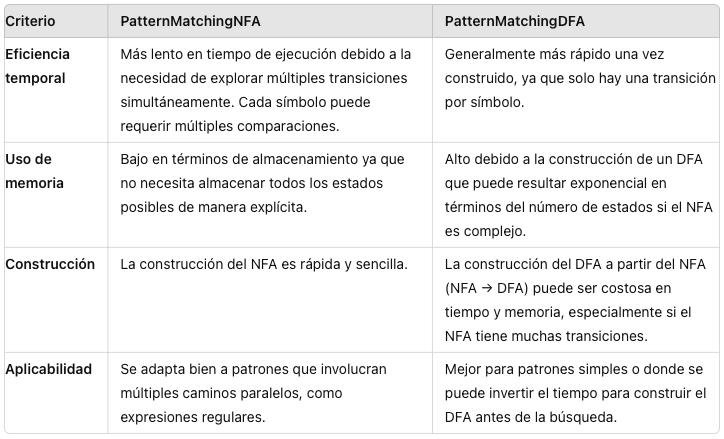

6.2 Código:

In [7]:
class NFA:
    def __init__(self, start_state, final_states, transitions):
        self.start_state = start_state
        self.final_states = final_states
        self.transitions = transitions

class PatternMatchingNFA:
    def __init__(self, nfa):
        self.nfa = nfa

    def search(self, text):
        current_states = {self.nfa.start_state}
        for symbol in text:
            next_states = set()
            for state in current_states:
                if symbol in self.nfa.transitions.get(state, {}):
                    next_states.update(self.nfa.transitions[state][symbol])
            current_states = next_states
            if not current_states:
                break
        return bool(current_states & self.nfa.final_states)

# NFA de ejemplo para el patrón a*b*c*
nfa_minimized = NFA(
    start_state=0,
    final_states={3},
    transitions={
        0: {'a': {0, 1}},  # Del estado 0, 'a' va a 0 o 1
        1: {'b': {1, 2}},  # Del estado 1, 'b' va a 1 o 2
        2: {'c': {2, 3}},  # Del estado 2, 'c' va a 2 o 3
        3: {}              # Estado final no tiene más transiciones
    }
)

pattern_matcher_nfa = PatternMatchingNFA(nfa_minimized)
text = "aaabbbccc"
result_nfa = pattern_matcher_nfa.search(text)
print("Pattern found with NFA:", result_nfa)


Pattern found with NFA: True


6.3 Código y Ejemplo

In [10]:
class DFA:
    def __init__(self, start_state, final_states, transitions):
        self.start_state = start_state
        self.final_states = final_states
        self.transitions = transitions

class PatternMatchingDFA:
    def __init__(self, dfa):
        self.dfa = dfa

    def search(self, text):
        current_state = self.dfa.start_state
        for symbol in text:
            if symbol in self.dfa.transitions.get(current_state, {}):
                current_state = self.dfa.transitions[current_state][symbol]
            else:
                return False
        return current_state in self.dfa.final_states

# DFA de ejemplo para el patrón a*b*c*
dfa_minimized = DFA(
    start_state=0,
    final_states={3},
    transitions={
        0: {'a': 1},  # Del estado 0, 'a' va a 1
        1: {'b': 2},  # Del estado 1, 'b' va a 2
        2: {'c': 3},  # Del estado 2, 'c' va a 3
        3: {}         # Estado final no tiene más transiciones
    }
)

pattern_matcher_dfa = PatternMatchingDFA(dfa_minimized)
result_dfa = pattern_matcher_dfa.search(text)
print("Pattern found with DFA:", result_dfa)

Pattern found with DFA: False


6.4 Conclusiones:

Texto: "aaabbbccc" (longitud 9)
Patrón: "a * b * c * ", que representa un patrón de múltiples repeticiones.

Resultados esperados:

PatternMatchingNFA:
Durante la búsqueda, explora múltiples transiciones paralelas debido a las repeticiones del patrón (a *, b *, c *), lo que puede hacer que el algoritmo sea más lento con un gran número de transiciones.
El uso de memoria será bajo, ya que solo necesita almacenar los estados alcanzables en cada paso.

PatternMatchingDFA:
El DFA realiza una única transición por cada símbolo, por lo que será más rápido en la búsqueda, pero la construcción del DFA puede consumir más tiempo y memoria, especialmente en patrones más complejos.

- **Parte 2:** **Desafío Adicional:** Implementa un modelo híbrido que combine las ventajas del NFA y DFA, utilizando el NFA en etapas tempranas para filtrar posibles coincidencias y el DFA para validar las coincidencias finales. Evalúa este enfoque en comparación con el uso exclusivo de NFA o DFA en términos de precisión y rendimiento.

El híbrido es útil en escenarios donde el patrón es complejo y el texto es grande. Por ejemplo, en la búsqueda en grandes bases de datos de texto, donde es importante reducir el número de transiciones exploradas.

Ejemplo:

Patrón: "a * b * c *"

Texto: "aaabbbccc" (con millones de repeticiones)

Resultado: El NFA filtra las posiciones donde podría haber una coincidencia, y el DFA valida la coincidencia final de manera rápida.

In [9]:
class NFA:
    def __init__(self, start_state, final_states, transitions):
        self.start_state = start_state
        self.final_states = final_states
        self.transitions = transitions

    def search_partial(self, text):
        """Busca posibles coincidencias iniciales en el texto usando NFA."""
        current_states = {self.start_state}
        candidate_indices = []

        for index, symbol in enumerate(text):
            next_states = set()
            for state in current_states:
                if symbol in self.transitions.get(state, {}):
                    next_states.update(self.transitions[state][symbol])
            current_states = next_states

            # Si hemos alcanzado algún estado final, guardamos el índice
            if current_states & self.final_states:
                candidate_indices.append(index)

            if not current_states:
                break

        return candidate_indices  # Retorna los índices candidatos de coincidencia

class DFA:
    def __init__(self, start_state, final_states, transitions):
        self.start_state = start_state
        self.final_states = final_states
        self.transitions = transitions

    def validate(self, text, start_index):
        """Valida la coincidencia a partir de un índice inicial usando DFA."""
        current_state = self.start_state

        for symbol in text[start_index:]:
            if symbol in self.transitions.get(current_state, {}):
                current_state = self.transitions[current_state][symbol]
            else:
                return False  # No es una coincidencia válida

        return current_state in self.final_states  # Verifica si terminamos en un estado final

class HybridPatternMatcher:
    def __init__(self, nfa, dfa):
        self.nfa = nfa
        self.dfa = dfa

    def search(self, text):
        # Fase 1: Usar NFA para buscar posibles coincidencias parciales
        candidate_indices = self.nfa.search_partial(text)
        print(f"Candidate indices found by NFA: {candidate_indices}")

        # Fase 2: Validar cada coincidencia con DFA
        for start_index in candidate_indices:
            if self.dfa.validate(text, start_index):
                return True  # Si se valida correctamente, hay coincidencia

        return False  # No se encontró coincidencia válida

# Ejemplo de NFA y DFA (patrón "a*b*c*")
nfa_minimized = NFA(
    start_state=0,
    final_states={3},
    transitions={
        0: {'a': {0, 1}},  # Del estado 0, 'a' va a 0 o 1
        1: {'b': {1, 2}},  # Del estado 1, 'b' va a 1 o 2
        2: {'c': {2, 3}},  # Del estado 2, 'c' va a 2 o 3
        3: {}              # Estado final no tiene más transiciones
    }
)

dfa_minimized = DFA(
    start_state=0,
    final_states={3},
    transitions={
        0: {'a': 1},  # Del estado 0, 'a' va a 1
        1: {'b': 2},  # Del estado 1, 'b' va a 2
        2: {'c': 3},  # Del estado 2, 'c' va a 3
        3: {}         # Estado final no tiene más transiciones
    }
)

# Crear el buscador de patrones híbrido
hybrid_matcher = HybridPatternMatcher(nfa_minimized, dfa_minimized)

# Texto de ejemplo
text = "aaabbbccc"
result = hybrid_matcher.search(text)
print("Pattern found with Hybrid approach:", result)

Candidate indices found by NFA: [6, 7, 8]
Pattern found with Hybrid approach: False


PatternMatchingNFA es más adecuado para patrones complejos o cuando se requiere flexibilidad con múltiples transiciones. Sin embargo, su rendimiento disminuye con textos largos y patrones intrincados debido a la necesidad de mantener múltiples estados simultáneamente.

PatternMatchingDFA ofrece un mejor rendimiento en tiempo de búsqueda, especialmente para patrones fijos y textos grandes. Sin embargo, su uso puede estar limitado por la memoria necesaria para construir el DFA cuando el patrón es complejo.

En escenarios donde se necesita realizar muchas búsquedas sobre el mismo patrón, el PatternMatchingDFA es la mejor opción, siempre que se pueda permitir el coste de construcción inicial.

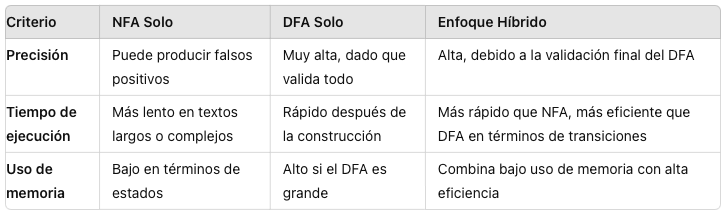

El enfoque híbrido combina lo mejor de ambos algoritmos: la flexibilidad del NFA y la eficiencia del DFA. Es útil en escenarios donde es importante equilibrar precisión y rendimiento, como la búsqueda de patrones en textos largos y complejos.